In [9]:
import matplotlib.pyplot as plt
import PIL
import cv2
import os
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url,cache_dir='.',untar=True) # untar is used to unzip a zip file

In [20]:
data_dir = r"C:\Users\tarus\deep_learning_codebasics\datasets\flower_photos"

In [21]:
import pathlib
data_dir = pathlib.Path(data_dir) # converts images into windows path object
data_dir

WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos')

In [22]:
list(data_dir.glob("*/*.jpg"))

[WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/1043775417

In [23]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [24]:
roses = list(data_dir.glob("roses/*.jpg"))
roses[:5]

[WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

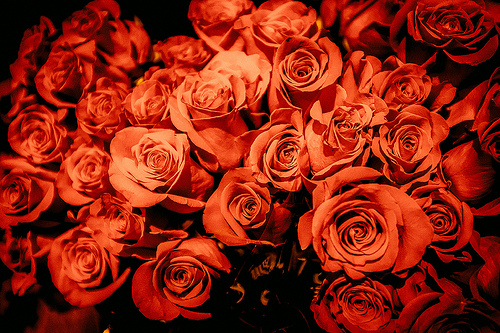

In [26]:
PIL.Image.open(str(roses[2]))

In [27]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips[:5]

[WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

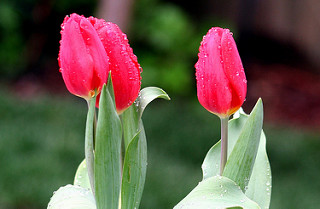

In [28]:
PIL.Image.open(str(tulips[0]))

In [29]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [30]:
flower_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [31]:
flowers_images_dict['daisy'][1]

WindowsPath('C:/Users/tarus/deep_learning_codebasics/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg')

In [32]:
str(flowers_images_dict['daisy'][1])

'C:\\Users\\tarus\\deep_learning_codebasics\\datasets\\flower_photos\\daisy\\10140303196_b88d3d6cec.jpg'

In [33]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
# cv2 does not accept window path, it requires str path

In [55]:
img.shape
# cv2 is used to convert the flowers images in path into numpy array

(180, 180, 3)

In [57]:
img

array([[[ 49,  54,  61],
        [ 92,  93,  63],
        [ 41,  47,  49],
        ...,
        [178, 164, 153],
        [ 89,  93,  59],
        [ 91,  83,  83]],

       [[ 47,  59,  53],
        [ 38,  53,  45],
        [ 69,  72,  72],
        ...,
        [151, 137, 128],
        [127, 112, 121],
        [148, 136, 131]],

       [[ 37,  30,  32],
        [ 41,  51,  30],
        [ 35,  37,  33],
        ...,
        [144, 126, 130],
        [147, 140, 119],
        [ 92,  89,  64]],

       ...,

       [[  1,  69, 114],
        [  4,  72, 107],
        [  6,  59, 103],
        ...,
        [  2,  79,  66],
        [  6,  64,  55],
        [  3,  73,  53]],

       [[  0,  59,  88],
        [  4,  42,  80],
        [  6,  28,  47],
        ...,
        [  4,  66,  63],
        [  5,  59,  57],
        [  1,  63,  42]],

       [[  3,  24,  34],
        [  5,  37,  45],
        [  3,  37,  35],
        ...,
        [  4,  51,  50],
        [  0,  41,  39],
        [ 28,  97,  68]]

In [ ]:
cv2.resize(img,(180,180)).shape
# resize the images to some standard size as each image is of different size 

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - resize() missing required argument 'dsize' (pos 2)
>  - resize() missing required argument 'dsize' (pos 2)


In [37]:
X,y = [],[]
for flower_name,images in flowers_images_dict.items():
    for img in images:
        img = cv2.imread(str(img))
        img = cv2.resize(img,(180,180))
        X.append(img)
        y.append(flower_labels_dict[flower_name])

In [38]:
X = np.array(X)
y = np.array(y)

In [39]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
# scaling images
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [41]:
# building convolutional neural network
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5) # no. of labels=5, as there is no activation therefore by default it will be linear
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 51s 38ms/step - loss: 1.3516 - accuracy: 0.4041
Epoch 2/30
86/86 [==============================] - 3s 36ms/step - loss: 1.0270 - accuracy: 0.5883
Epoch 3/30
86/86 [==============================] - 3s 35ms/step - loss: 0.8643 - accuracy: 0.6788
Epoch 4/30
86/86 [==============================] - 3s 36ms/step - loss: 0.6280 - accuracy: 0.7605
Epoch 5/30
86/86 [==============================] - 3s 36ms/step - loss: 0.3908 - accuracy: 0.8681
Epoch 6/30
86/86 [==============================] - 3s 36ms/step - loss: 0.2229 - accuracy: 0.9302
Epoch 7/30
86/86 [==============================] - 3s 35ms/step - loss: 0.1304 - accuracy: 0.9615
Epoch 8/30
86/86 [==============================] - 3s 36ms/step - loss: 0.0684 - accuracy: 0.9818
Epoch 9/30
86/86 [==============================] - 3s 37ms/step - loss: 0.0376 - accuracy: 0.9887
Epoch 10/30
86/86 [==============================] - 3s 37ms/step - loss: 0.0400 - accuracy: 0.9909
Epoch 11

In [42]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 19ms/step - loss: 3.1328 - accuracy: 0.6394


[3.1327919960021973, 0.6394335627555847]

In [43]:
predictions = model.predict(x_test_scaled)
predictions

29/29 [==============================] - 0s 12ms/step


array([[ 10.49294   ,  -6.5395827 ,  -9.736884  ,   9.402712  ,
         14.859651  ],
       [  0.6326213 , -16.344212  ,   3.6925328 ,  21.587677  ,
          1.9794506 ],
       [  4.3007855 ,   0.52662736,  -0.4336569 ,   1.3065947 ,
          7.2967644 ],
       ...,
       [  0.7725036 ,  -0.47766334,  -7.1973333 ,  23.18455   ,
          5.0774    ],
       [ -1.9861794 , -28.14001   ,   7.6223125 ,  25.66381   ,
          9.192157  ],
       [ 10.369664  ,  25.811747  ,   1.778184  ,  -4.8107157 ,
        -10.073085  ]], dtype=float32)

In [44]:
score = tf.nn.softmax(predictions[5])
score # convert the result to get probability of each label which we do not get in the above step as we used linear activation function by default

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.5857278e-04, 8.9761972e-01, 2.6218821e-03, 9.8799817e-02,
       4.4496976e-12], dtype=float32)>

In [45]:
np.argmax(score)

1

In [46]:
y_test[5]

3

# improve test accuracy by data augmentation

In [58]:
data_aug = keras.Sequential([
    layers.RandomFlip('horizontal',input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

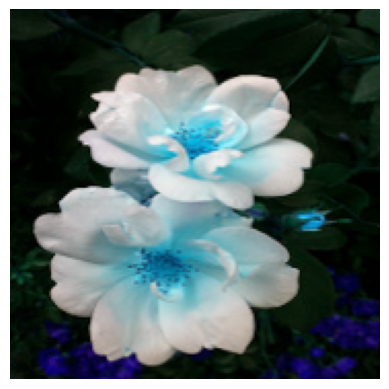

In [59]:
plt.axis('off')
plt.imshow(X[0])

In [60]:
# building convolutional neural network
model = Sequential([
    data_aug,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5) # no. of labels=5, as there is no activation therefore by default it will be linear
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 17s 160ms/step - loss: 1.3998 - accuracy: 0.3859
Epoch 2/30
86/86 [==============================] - 12s 143ms/step - loss: 1.0738 - accuracy: 0.5661
Epoch 3/30
86/86 [==============================] - 12s 144ms/step - loss: 0.9699 - accuracy: 0.6116
Epoch 4/30
86/86 [==============================] - 12s 142ms/step - loss: 0.9008 - accuracy: 0.6493
Epoch 5/30
86/86 [==============================] - 12s 144ms/step - loss: 0.8460 - accuracy: 0.6737
Epoch 6/30
86/86 [==============================] - 12s 141ms/step - loss: 0.7664 - accuracy: 0.7068
Epoch 7/30
86/86 [==============================] - 12s 143ms/step - loss: 0.7290 - accuracy: 0.7198
Epoch 8/30
86/86 [==============================] - 13s 154ms/step - loss: 0.6683 - accuracy: 0.7504
Epoch 9/30
86/86 [==============================] - 12s 141ms/step - loss: 0.6322 - accuracy: 0.7544
Epoch 10/30
86/86 [==============================] - 12s 145ms/step - loss: 0.5967 - accura

In [61]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 13ms/step - loss: 1.2334 - accuracy: 0.7081


[1.2333658933639526, 0.7080609798431396]